Saving 1730285881-Airbnb_Open_Data.xlsx to 1730285881-Airbnb_Open_Data (2).xlsx
Uploaded file: 1730285881-Airbnb_Open_Data (2).xlsx
Dataset Shape: (102599, 26)


/tmp/ipython-input-32332874.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=property_types.index, y=property_types.values, palette="viridis")


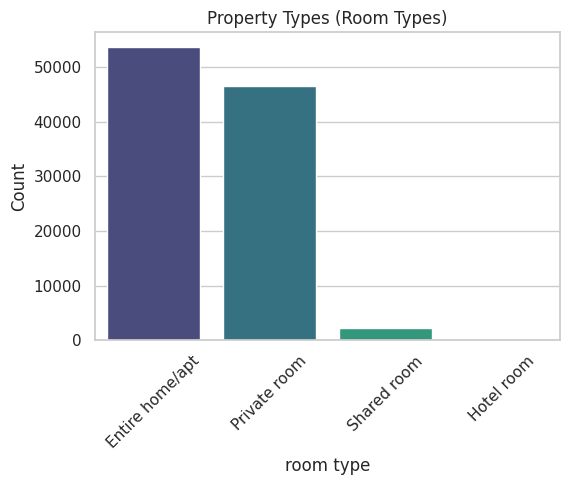

/tmp/ipython-input-32332874.py:68: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=most_listings, x="neighbourhood group", y="count", palette="magma")


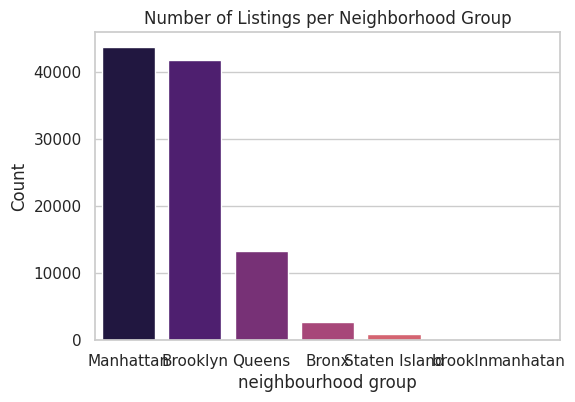

/tmp/ipython-input-32332874.py:77: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_price, x=col_neigh, y=col_price, palette="coolwarm")


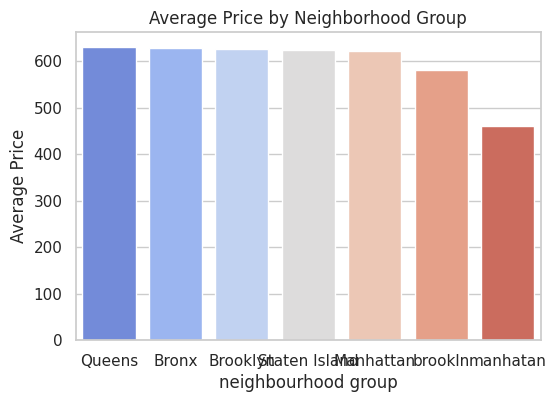

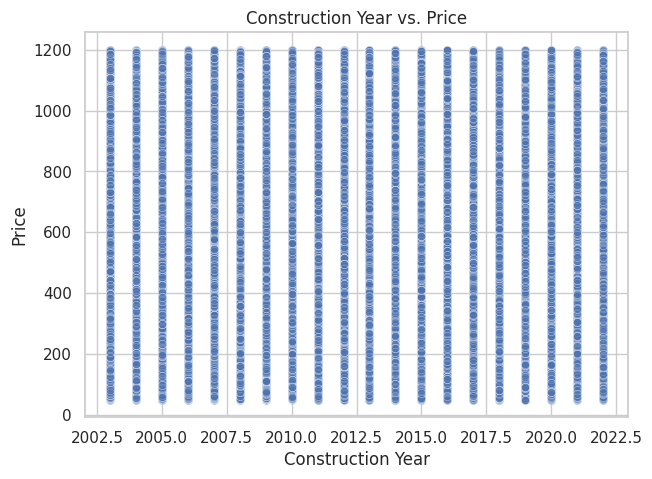

/tmp/ipython-input-32332874.py:102: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_hosts, x=col_host_name, y=col_host_listings, palette="plasma")


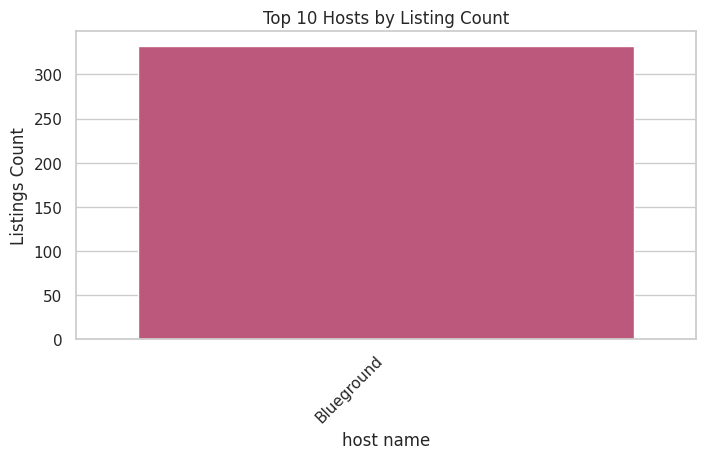

/tmp/ipython-input-32332874.py:113: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=verified_reviews, x=col_host_verified, y=col_review_rate, palette="Set2")


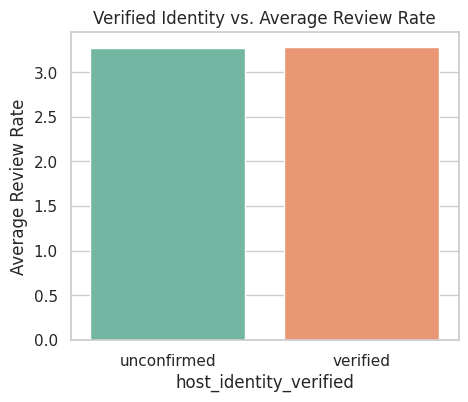

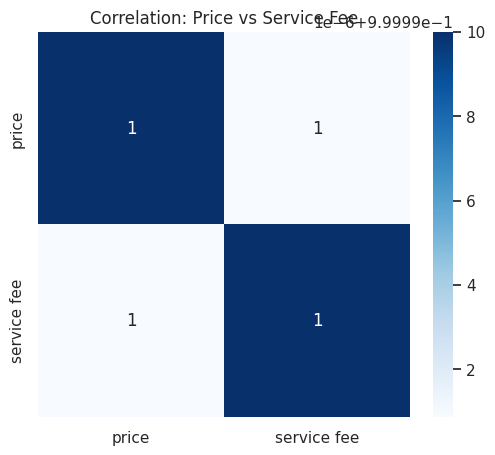

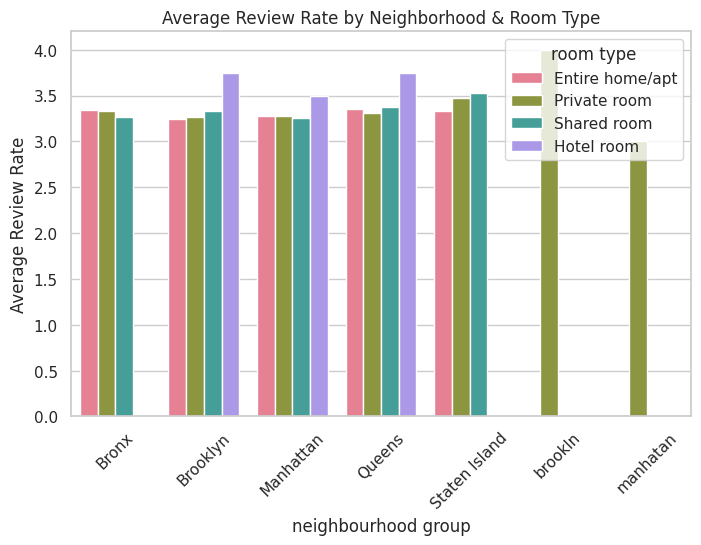

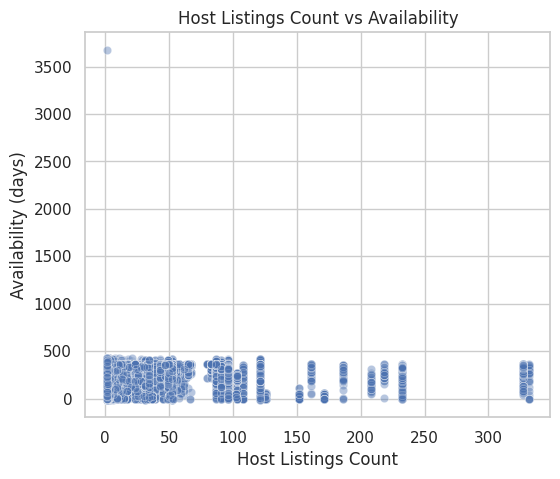

✅ Analysis + Visualizations complete! All CSVs and plots generated.


In [6]:
# ==========================================
# Airbnb Data Analysis in Google Colab (with Visuals)
# ==========================================

# Install required packages
!pip install openpyxl seaborn

# -----------------------------
# Import libraries
# -----------------------------
from google.colab import files
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Style
sns.set(style="whitegrid")

# -----------------------------
# 1. Upload dataset
# -----------------------------
uploaded = files.upload()   # Upload your "Airbnb_Open_Data.xlsx"

file_path = list(uploaded.keys())[0]
print("Uploaded file:", file_path)

# Load dataset
df = pd.read_excel(file_path, sheet_name="in")
print("Dataset Shape:", df.shape)
df.head()

# -----------------------------
# Normalize column names
# -----------------------------
cols = {c.lower().strip(): c for c in df.columns}

col_price = cols.get("price")
col_neigh = cols.get("neighbourhood group")
col_room = cols.get("room type")
col_year = cols.get("construction year")
col_host = cols.get("host id")
col_host_name = cols.get("host name")
col_host_verified = cols.get("host_identity_verified")
col_host_listings = cols.get("calculated host listings count")
col_availability = cols.get("availability 365")
col_service_fee = cols.get("service fee")
col_review_rate = cols.get("review rate number")

# ==========================================================
# ANALYSIS + VISUALIZATIONS
# ==========================================================

# 1. Property types
property_types = df[col_room].value_counts()
property_types.to_csv("property_types.csv")
plt.figure(figsize=(6,4))
sns.barplot(x=property_types.index, y=property_types.values, palette="viridis")
plt.title("Property Types (Room Types)")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

# 2. Neighborhood group with most listings
most_listings = df[col_neigh].value_counts().reset_index()
most_listings.columns = ["neighbourhood group", "count"]
most_listings.to_csv("neighborhood_most_listings.csv", index=False)
plt.figure(figsize=(6,4))
sns.barplot(data=most_listings, x="neighbourhood group", y="count", palette="magma")
plt.title("Number of Listings per Neighborhood Group")
plt.ylabel("Count")
plt.show()

# 3. Neighborhood group with highest average prices
avg_price = df.groupby(col_neigh)[col_price].mean().reset_index().sort_values(by=col_price, ascending=False)
avg_price.to_csv("neighborhood_avg_price.csv", index=False)
plt.figure(figsize=(6,4))
sns.barplot(data=avg_price, x=col_neigh, y=col_price, palette="coolwarm")
plt.title("Average Price by Neighborhood Group")
plt.ylabel("Average Price")
plt.show()

# 4. Relationship between construction year and price
if col_year:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x=col_year, y=col_price, alpha=0.5)
    plt.title("Construction Year vs. Price")
    plt.xlabel("Construction Year")
    plt.ylabel("Price")
    plt.show()

# 5. Top 10 hosts by calculated host listings count
if col_host_listings:
    top_hosts = (
        df.groupby([col_host, col_host_name])[col_host_listings]
        .max()
        .reset_index()
        .sort_values(by=col_host_listings, ascending=False)
        .head(10)
    )
    top_hosts.to_csv("top_hosts.csv", index=False)
    plt.figure(figsize=(8,4))
    sns.barplot(data=top_hosts, x=col_host_name, y=col_host_listings, palette="plasma")
    plt.title("Top 10 Hosts by Listing Count")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Listings Count")
    plt.show()

# 6. Hosts with verified identities vs positive reviews
if col_host_verified and col_review_rate:
    verified_reviews = df.groupby(col_host_verified)[col_review_rate].mean().reset_index()
    verified_reviews.to_csv("verified_vs_reviews.csv", index=False)
    plt.figure(figsize=(5,4))
    sns.barplot(data=verified_reviews, x=col_host_verified, y=col_review_rate, palette="Set2")
    plt.title("Verified Identity vs. Average Review Rate")
    plt.ylabel("Average Review Rate")
    plt.show()

# 7. Correlation between price and service fee
if col_service_fee:
    plt.figure(figsize=(6,5))
    sns.heatmap(df[[col_price, col_service_fee]].corr(), annot=True, cmap="Blues")
    plt.title("Correlation: Price vs Service Fee")
    plt.show()

# 8. Average review rate by neighborhood group and room type
if col_review_rate:
    review_summary = df.groupby([col_neigh, col_room])[col_review_rate].mean().reset_index()
    review_summary.to_csv("review_summary.csv", index=False)
    plt.figure(figsize=(8,5))
    sns.barplot(data=review_summary, x=col_neigh, y=col_review_rate, hue=col_room, palette="husl")
    plt.title("Average Review Rate by Neighborhood & Room Type")
    plt.ylabel("Average Review Rate")
    plt.xticks(rotation=45)
    plt.show()

# 9. Availability vs host listing count
if col_host_listings and col_availability:
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df, x=col_host_listings, y=col_availability, alpha=0.4)
    plt.title("Host Listings Count vs Availability")
    plt.xlabel("Host Listings Count")
    plt.ylabel("Availability (days)")
    plt.show()

print("✅ Analysis + Visualizations complete! All CSVs and plots generated.")
